In [1]:
#source data: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI
#DOCS: https://exoplanetarchive.ipac.caltech.edu/docs/API_TOI_columns.html
'''In this project, I aim to classify the planetary candidates from TESS data as planet or not, and evaluating performance on balanced vs unbalanced datasets. 
TESS Data has many categories for planetary candidates namely: 
FP - False Positive, 
PC - Planetary Candidate, 
KP - Known Planet, 
APC - Ambiguous Planetary Candidate, 
CP - Confirmed Planet, 
FA - False Alarm.
For this analysis, I have renamed KP and CP as 'yes' planets, and remaining as not planets for simplicity and interpretability. 
Detailed documentation about the source data can be found under the #docs link. '''

"In this project, I aim to classify the planetary candidates from TESS data as planet or not, and evaluating performance on balanced vs unbalanced datasets. \nTESS Data has many categories for planetary candidates namely: \nFP - False Positive, \nPC - Planetary Candidate, \nKP - Known Planet, \nAPC - Ambiguous Planetary Candidate, \nCP - Confirmed Planet, \nFA - False Alarm.\nFor this analysis, I have renamed KP and CP as 'yes' planets, and remaining as not planets for simplicity and interpretability. \nDetailed documentation about the source data can be found under the #docs link. "

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_raw = pd.read_csv('data.csv')
df = df_raw[['tfopwg_disp','pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad']]
df.describe()

,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_teff,st_rad
count,7.208000e+03,7107.000000,7208.000000,7208.000000,6738.000000,7059.000000,6932.000000,7208.000000,7077.000000,6738.000000
mean,2.459472e+06,18.352987,3.048401,8112.419278,10.315412,2169.355769,1282.428478,11.519591,5797.558528,1.406348
std,5.398741e+02,100.414952,1.845579,15398.157588,8.688484,10202.371058,680.515789,1.638553,1502.886207,1.641895
min,2.457926e+06,0.152076,0.101000,23.453970,0.552507,0.000342,37.000000,4.627800,2808.000000,0.114827
25%,2.459183e+06,2.457828,1.838000,1372.457179,4.376090,86.313200,818.750000,10.354375,5203.400000,0.890000
50%,2.459522e+06,4.078527,2.722000,4730.000000,10.509315,364.211000,1185.000000,11.762800,5801.000000,1.233390
75%,2.459905e+06,7.871880,3.779076,10301.750000,14.045700,1164.390000,1588.000000,12.831175,6301.300000,1.660000
max,2.460479e+06,1837.889731,24.052709,504062.379922,297.111726,280833.000000,6413.000000,18.332400,50000.000000,102.030000


In [3]:
df.isnull().sum()

tfopwg_disp      7
pl_tranmid       0
pl_orbper      101
pl_trandurh      0
pl_trandep       0
pl_rade        470
pl_insol       149
pl_eqt         276
st_tmag          0
st_teff        131
st_rad         470
dtype: int64

In [4]:
df.dropna(inplace=True)

C:\Users\mithu\AppData\Local\Temp\ipykernel_9916\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


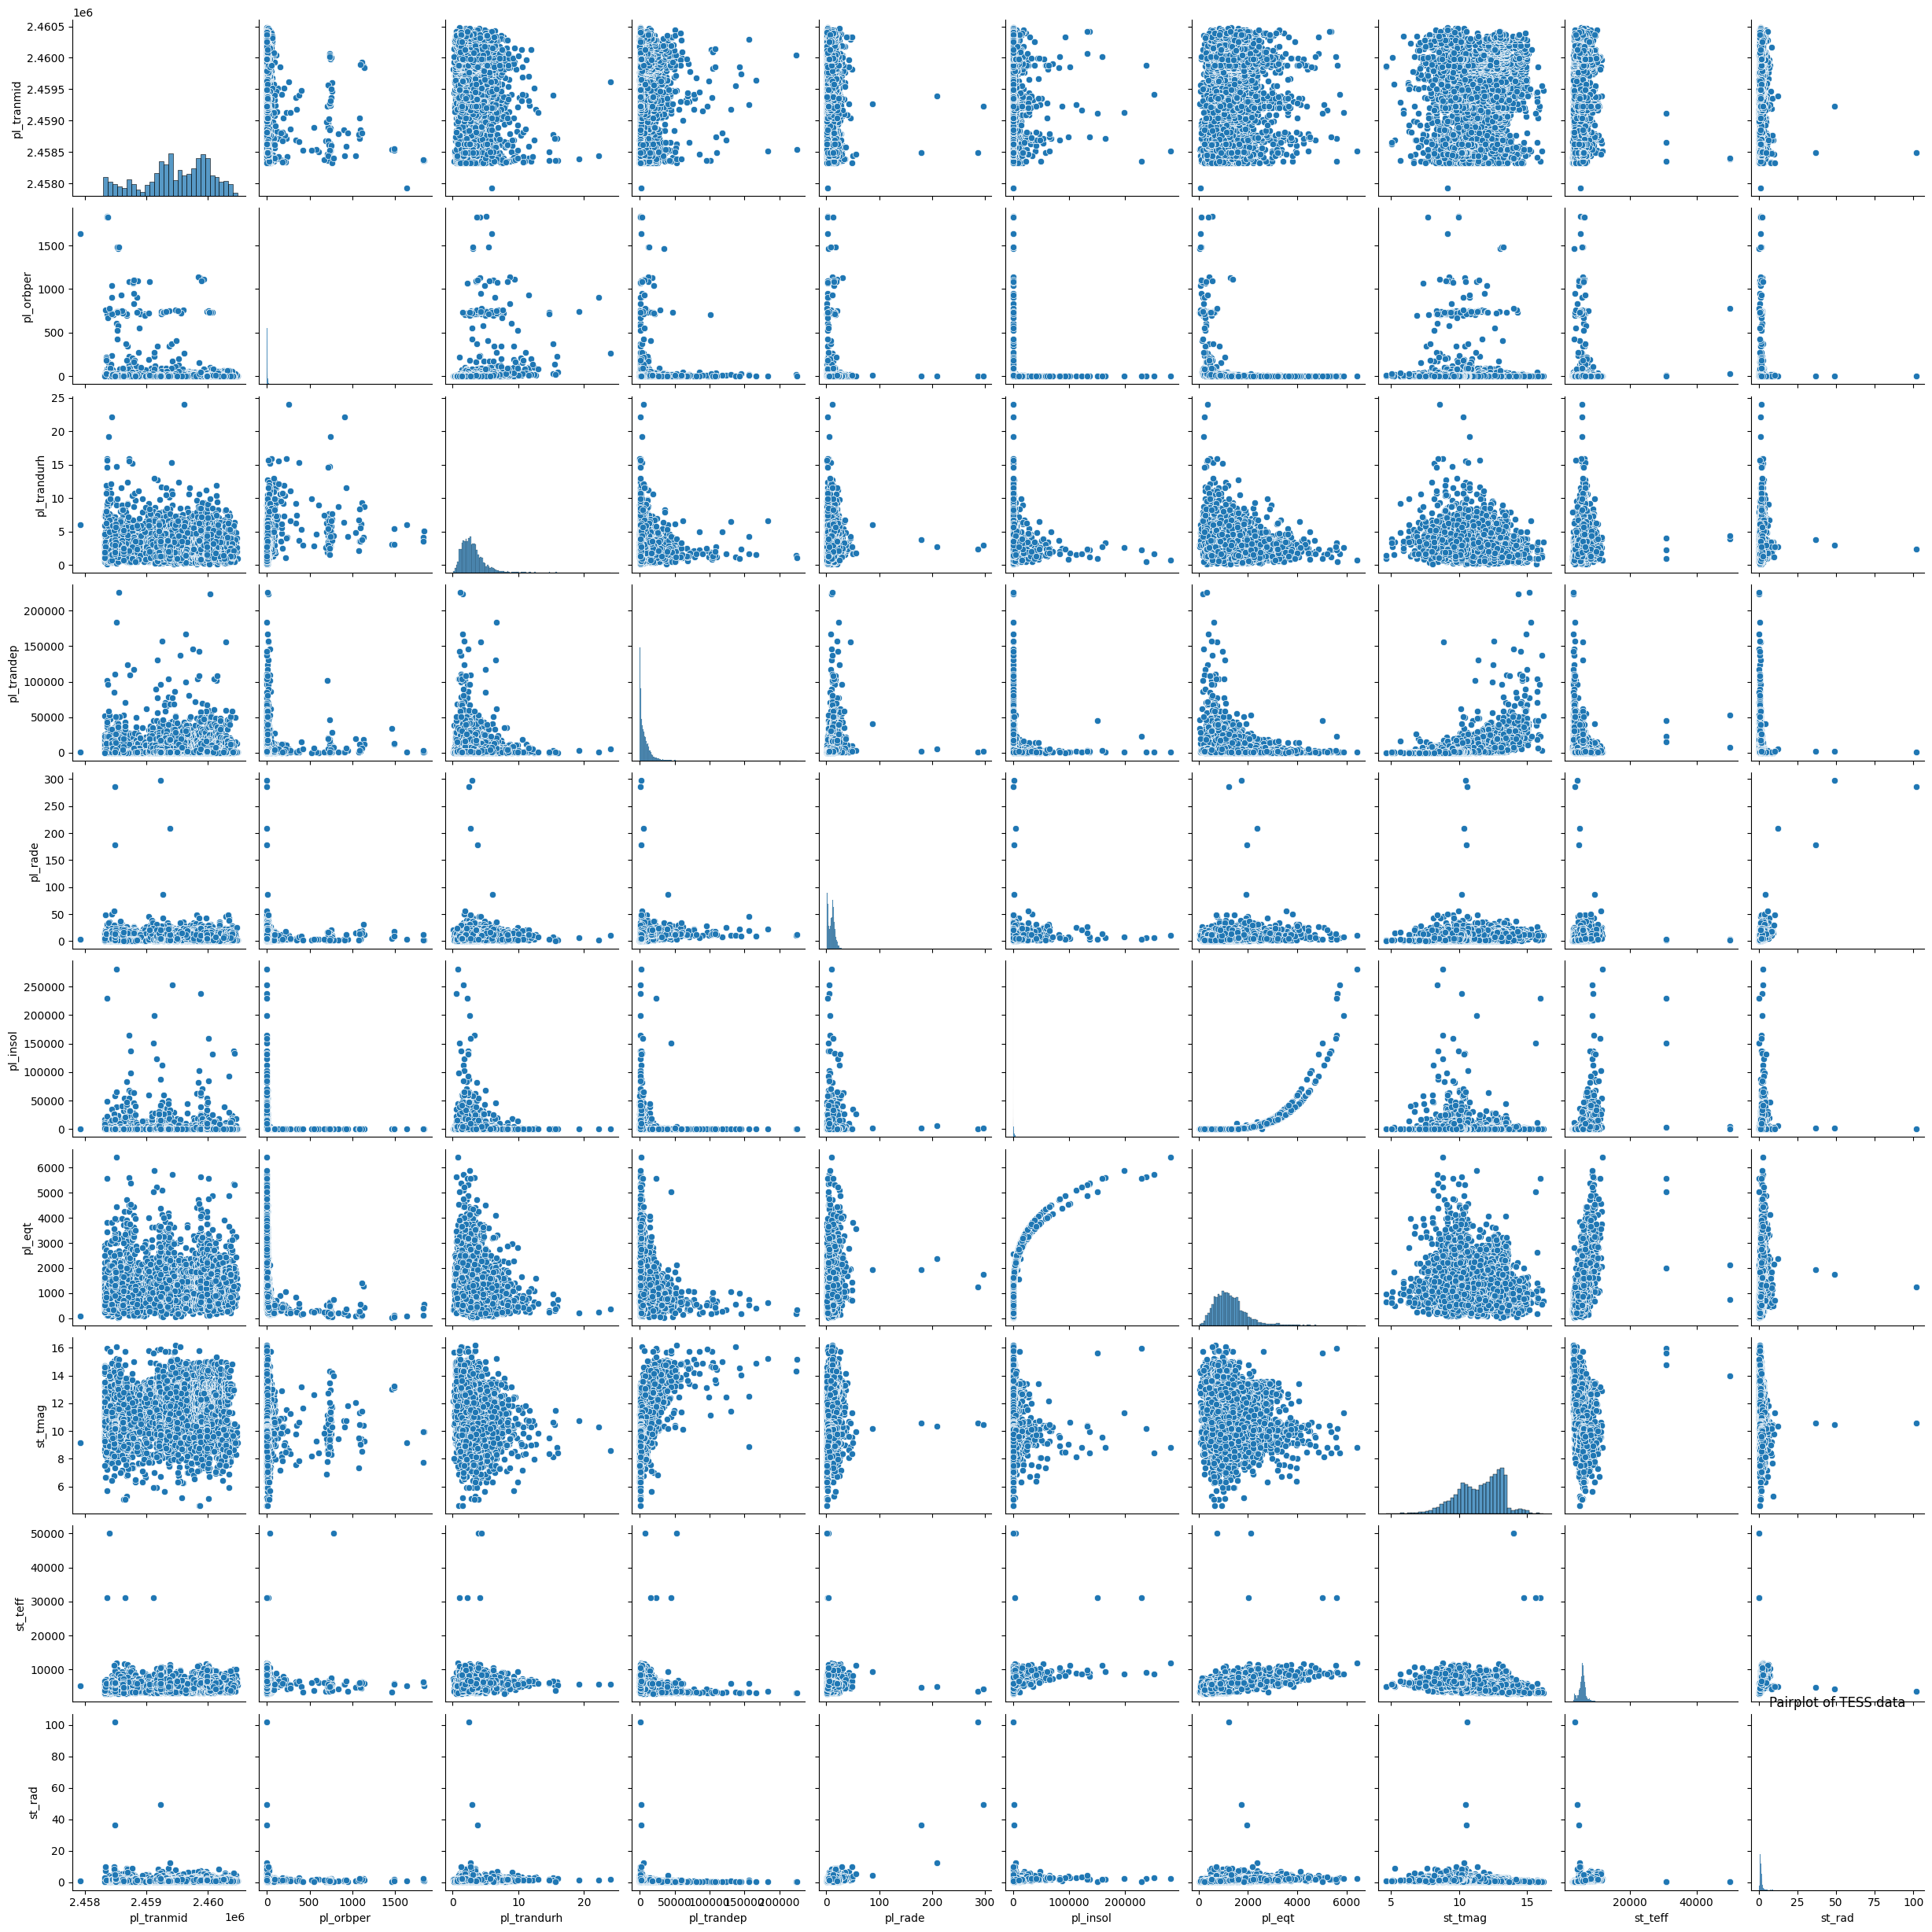

In [7]:
sns.pairplot(df[['pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad']])
plt.title("Pairplot of TESS data")
plt.show()

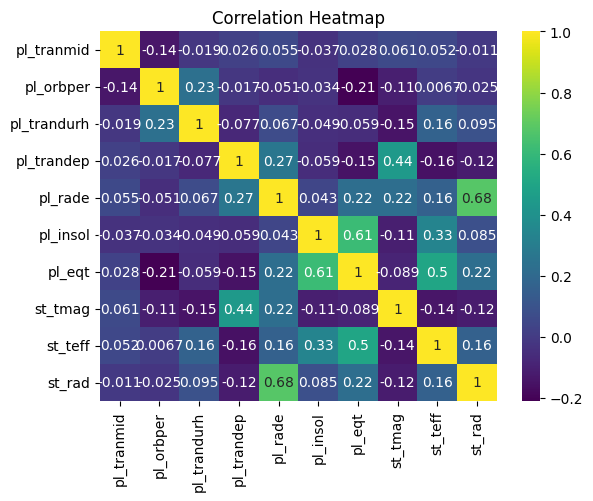

In [8]:
df_heat = df[['pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad']]
correlation_matrix = df_heat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
'''From the Pairplot and the Correlation matrix, we can see that using Logistic Regression, SVM and Naive Bayes is out of the question
Because the features don't have a linear relationship. I plan to use ensemble models to predict, but we need to tackle another problem before moving on to model building'''

"From the Pairplot and the Correlation matrix, we can see that using Logistic Regression, SVM and Naive Bayes is out of the question\nBecause the features don't have a linear relationship. I plan to use ensemble models to predict, but we need to tackle another problem before moving on to model building"

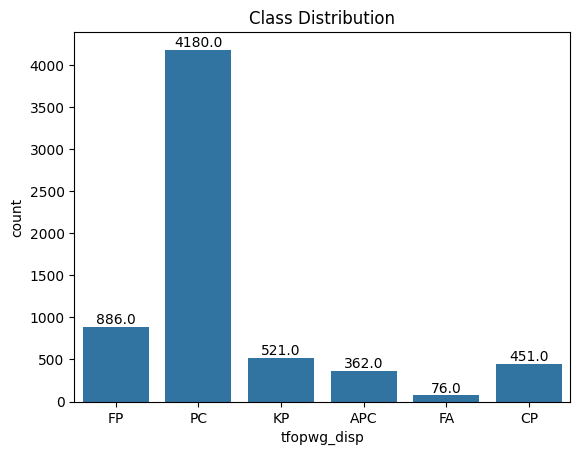

In [10]:
sns.countplot(x='tfopwg_disp', data=df)
plt.title('Class Distribution')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), ha="center", va="bottom")
plt.show()

In [11]:
#Making a new column to separate KP and CP from others for increased interpretability
df['is_confirmed'] = 'N'
target_class1 = 'KP'
target_class2 = 'CP'
df.loc[df['tfopwg_disp'].isin([target_class1, target_class2]), 'is_confirmed'] = 'Y'
df.head()

C:\Users\mithu\AppData\Local\Temp\ipykernel_9916\515290377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_confirmed'] = 'N'


,tfopwg_disp,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_teff,st_rad,is_confirmed
0,FP,2.459230e+06,2.171348,2.01722,656.886099,5.818163,22601.948581,3127.204052,9.604000,10249.0,2.16986,N
1,PC,2.459988e+06,1.931646,3.16600,1286.000000,11.215400,44464.500000,4045.000000,9.423440,7070.0,2.01000,N
2,FP,2.459225e+06,1.867557,1.40800,1500.000000,23.752900,2860.610000,2037.000000,9.299501,8924.0,5.73000,N
4,FP,2.459987e+06,3.573014,3.37000,755.000000,11.311300,54679.300000,4260.000000,9.135500,9219.0,2.15000,N
5,FP,2.458493e+06,4.550720,2.59900,3620.000000,6.544490,254.050000,1112.000000,9.130900,5613.0,1.09000,N


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['is_confirmed'].values)
df['is_confirmed'] = y_encoded
df.head()

C:\Users\mithu\AppData\Local\Temp\ipykernel_9916\4277641403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_confirmed'] = y_encoded


,tfopwg_disp,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_teff,st_rad,is_confirmed
0,FP,2.459230e+06,2.171348,2.01722,656.886099,5.818163,22601.948581,3127.204052,9.604000,10249.0,2.16986,0
1,PC,2.459988e+06,1.931646,3.16600,1286.000000,11.215400,44464.500000,4045.000000,9.423440,7070.0,2.01000,0
2,FP,2.459225e+06,1.867557,1.40800,1500.000000,23.752900,2860.610000,2037.000000,9.299501,8924.0,5.73000,0
4,FP,2.459987e+06,3.573014,3.37000,755.000000,11.311300,54679.300000,4260.000000,9.135500,9219.0,2.15000,0
5,FP,2.458493e+06,4.550720,2.59900,3620.000000,6.544490,254.050000,1112.000000,9.130900,5613.0,1.09000,0


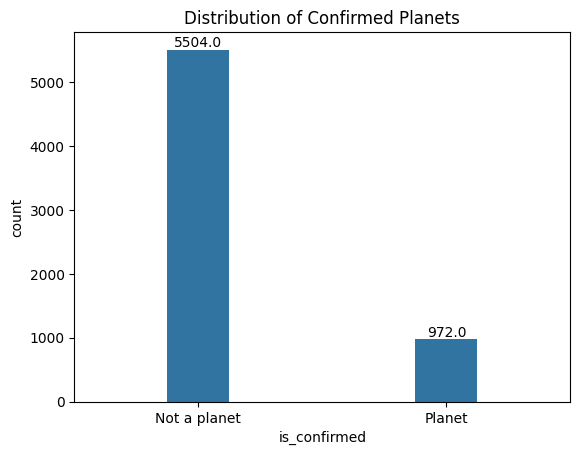

In [13]:
sns.countplot(x='is_confirmed', data=df, width=0.25) 
plt.xticks(ticks=[0, 1], labels=['Not a planet', 'Planet'])
plt.title('Distribution of Confirmed Planets')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), ha="center", va="bottom")
plt.show()

In [14]:
'''The dataset is very imbalanced, and as a result, will definitely impact model performance. 
In this project let us see how the model performance varies with balanced and imbalanced datasets. 
First let us see how ensemble models perform for this imbalanced dataset, and then perform SMOTE and then check model performance again.'''

'The dataset is very imbalanced, and as a result, will definitely impact model performance. \nIn this project let us see how the model performance varies with balanced and imbalanced datasets. \nFirst let us see how ensemble models perform for this imbalanced dataset, and then perform SMOTE and then check model performance again.'

Imbalanced Dataset models:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X = df[['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad']]
y = df[['is_confirmed']]
print(X.shape, y.shape)
X = X.values
y = y.values
y = y.reshape(-1)

(6476, 9) (6476, 1)


In [16]:
#RANDOM FOREST CLASSIFIER
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_rf)
print('Confusion Matrix:\n', cm_rf)

Accuracy: 0.8572530864197531
Confusion Matrix:
 [[1052   29]
 [ 156   59]]


In [17]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)
cm_gb = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_gb)
print('Confusion Matrix:\n', cm_gb)

Accuracy: 0.8564814814814815
Confusion Matrix:
 [[1058   23]
 [ 163   52]]


In [19]:
#Xtreme Gradient Boosting Classifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
cm_xgb = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_xgb)
print('Confusion Matrix:\n', cm_xgb)

Accuracy: 0.8595679012345679
Confusion Matrix:
 [[1037   44]
 [ 138   77]]


In [20]:
'''We now employ SMOTE Resampling, and then check the model performance'''
from imblearn.over_sampling import SMOTE
df = df.dropna(how='any')
X = df[['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad']]
y = df[['is_confirmed']]
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled.columns = ['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_rad', 'is_confirmed']
df_resampled.shape

(11008, 10)

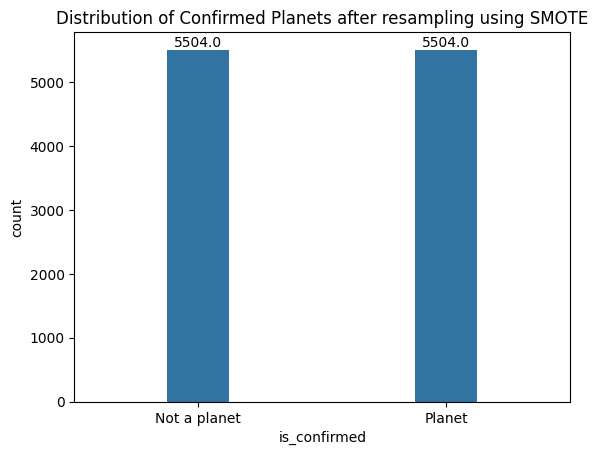

In [21]:
sns.countplot(x='is_confirmed', data=df_resampled, width=0.25) 
plt.xticks(ticks=[0, 1], labels=['Not a planet', 'Planet'])
plt.title('Distribution of Confirmed Planets after resampling using SMOTE')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), ha="center", va="bottom")
plt.show()

Balanced Dataset Models

In [22]:
#RANDOM FOREST CLASSIFIER
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf_b = accuracy_score(y_test, y_pred)
cm_rf_b = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_rf_b)
print('Confusion Matrix:\n', cm_rf_b)

c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8851044504995459
Confusion Matrix:
 [[ 942  156]
 [  97 1007]]


In [23]:
#Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_gb_b = accuracy_score(y_test, y_pred)
cm_gb_b = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_gb_b)
print('Confusion Matrix:\n', cm_gb_b)

c:\Users\mithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7938237965485921
Confusion Matrix:
 [[843 255]
 [199 905]]


In [24]:
#Xtreme Gradient Boost Classifier
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_xgb_b = accuracy_score(y_test, y_pred)
cm_xgb_b = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_xgb_b)
print('Confusion Matrix:\n', cm_xgb_b)

Accuracy: 0.8773841961852861
Confusion Matrix:
 [[ 921  177]
 [  93 1011]]


In [25]:
cm_rf = np.array(cm_rf)
cm_gb = np.array(cm_gb)
cm_xgb = np.array(cm_xgb)
cm_rf_b = np.array(cm_rf_b)
cm_gb_b = np.array(cm_gb_b)
cm_xgb_b = np.array(cm_xgb_b)
results = [{'Model': 'Random Forest Classifier', 'Balanced': 'No', 'Accuracy' : accuracy_rf, 'Confusion Matrix': cm_rf},
           {'Model': 'Random Forest Classifier', 'Balanced': 'Yes', 'Accuracy' : accuracy_rf_b, 'Confusion Matrix': cm_rf_b},
           {'Model': 'Gradient Boosting Classifier', 'Balanced': 'No', 'Accuracy' : accuracy_gb, 'Confusion Matrix': cm_gb},
           {'Model': 'Gradient Boosting Classifier', 'Balanced': 'Yes', 'Accuracy' : accuracy_gb_b, 'Confusion Matrix': cm_gb_b},
           {'Model': 'Xtreme Gradient Boosting Classifier', 'Balanced': 'No', 'Accuracy' : accuracy_xgb, 'Confusion Matrix': cm_xgb},
           {'Model': 'Xtreme Gradient Boosting Classifier', 'Balanced': 'Yes', 'Accuracy' : accuracy_xgb_b, 'Confusion Matrix': cm_xgb_b}]
results = pd.DataFrame(results)
results



,Model,Balanced,Accuracy,Confusion Matrix
0,Random Forest Classifier,No,0.857253,"[[1052, 29], [156, 59]]"
1,Random Forest Classifier,Yes,0.885104,"[[942, 156], [97, 1007]]"
2,Gradient Boosting Classifier,No,0.856481,"[[1058, 23], [163, 52]]"
3,Gradient Boosting Classifier,Yes,0.793824,"[[843, 255], [199, 905]]"
4,Xtreme Gradient Boosting Classifier,No,0.859568,"[[1037, 44], [138, 77]]"
5,Xtreme Gradient Boosting Classifier,Yes,0.877384,"[[921, 177], [93, 1011]]"


In [26]:
'''From the above data frame we can infer the following results:
For Unbalanced: XGBoost perfomed best, but all models performed relatively same.
For Balanced: Random Forest performed best.
Accuracy was improved in both Random Forest and XGBoost when the dataset was balanced using SMOTE.
Accuracy decreased in Gradient Boosting after SMOTE.
Thus RF and XGBoost are great models to use for Exoplanet Classification. '''

'From the above data frame we can infer the following results:\nFor Unbalanced: XGBoost perfomed best, but all models performed relatively same.\nFor Balanced: Random Forest performed best.\nAccuracy was improved in both Random Forest and XGBoost when the dataset was balanced using SMOTE.\nAccuracy decreased in Gradient Boosting after SMOTE.\nThus RF and XGBoost are great models to use for Exoplanet Classification. '